## Import the metaflow client

In [56]:
from metaflow import Flow, get_metadata
print("Current metadata provider: %s" % get_metadata())

Current metadata provider: local@/Users/Vittorio/Desktop/prophet-metaflow


In [57]:
run = Flow('ProphetFlow').latest_successful_run
print("Using run: %s" % str(run))

Using run: Run('ProphetFlow/1604842771848442')


In [58]:
print("Prophet model generated on %s\n" % str(run.finished_at))
print("Time series data file '%s'" % run.data.data_filename)
print("Column mapping used is '%s'" % run.data.columns_mapping)
print("Hyperparameters used: '%s'" % run.data.best_params)

Prophet model generated on 2020-11-08T13:43:08Z

Time series data file 'data/daily-min-temperatures.txt'
Column mapping used is '{'Date': 'ds', 'Temp': 'y'}'
Hyperparameters used: '{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}'


## Make prediction

In [59]:
# Prepare dataframe for prediction
future = run.data.m.make_future_dataframe(periods=365)
future.tail()

,ds
4010,1991-12-27
4011,1991-12-28
4012,1991-12-29
4013,1991-12-30
4014,1991-12-31


In [60]:
# Predict future values
forecast = run.data.m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4010,1991-12-27,14.474506,11.049663,17.968126
4011,1991-12-28,14.493657,10.898092,18.067873
4012,1991-12-29,14.469692,10.944091,17.998807
4013,1991-12-30,14.663238,11.034627,18.090929
4014,1991-12-31,14.827441,11.636874,17.994250


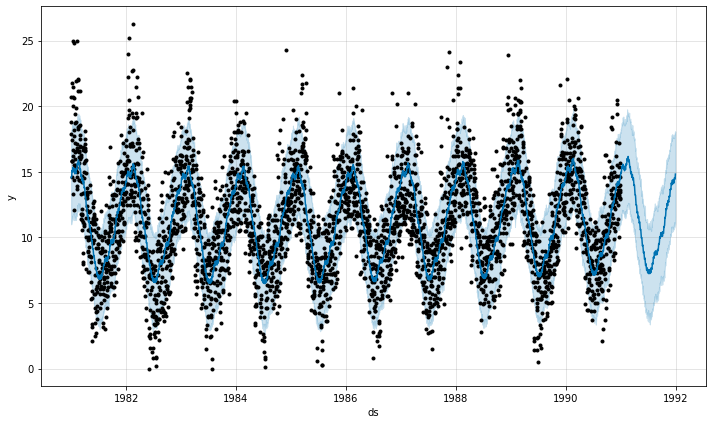

In [61]:
# Display results
fig1 = run.data.m.plot(forecast)

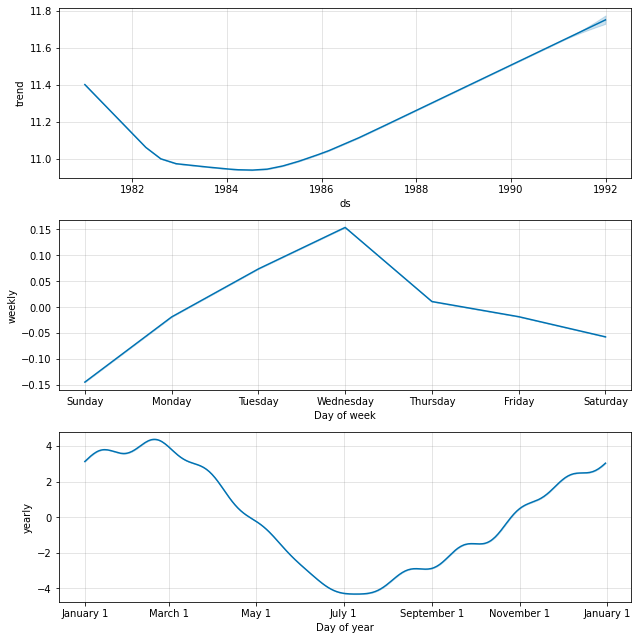

In [62]:
fig2 = run.data.m.plot_components(forecast)